# Show calculation details of QAOA circuit for p=1
We created the ideal circuit with the help of IBMQ by using QAOA in qiskit terra.
We will calculate the outcome with statevector and unitary sim.

In [1]:
import warnings
import numpy as np 
from numpy import pi
from matplotlib import MatplotlibDeprecationWarning
from qiskit import QuantumRegister, QuantumCircuit, execute, BasicAer
from qiskit_optimization import QuadraticProgram
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info.operators import Operator

Superposition state:  True


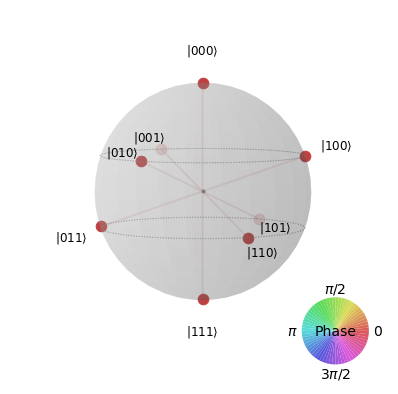

In [2]:
qreg_q = QuantumRegister(3, 'q')
qc_init = QuantumCircuit(qreg_q)
qc_init.h(qreg_q[0])
qc_init.h(qreg_q[1])
qc_init.h(qreg_q[2])
qc_init.barrier()
psi_0 = execute(qc_init, BasicAer.get_backend('statevector_simulator')).result().get_statevector(qc_init, \
                                              decimals=3)
superpos_state = np.ones(8, dtype=complex) / np.sqrt(8)
print("Superposition state: ",np.allclose(psi_0, superpos_state, rtol=0.01))
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
plot_state_qsphere(psi_0)

In [3]:
def pretty_print(x):
    """ print with 1 decimal only """
    with np.printoptions(precision=1, suppress=True):
        print(x)

In [4]:
qc_evol = QuantumCircuit(qreg_q)
qc_evol.cx(qreg_q[1], qreg_q[0])
qc_evol.rz(-0.06942544294642758, qreg_q[0])
qc_evol.cx(qreg_q[1], qreg_q[0])
qc_evol.rz(-0.20827632883928274, qreg_q[0])
qc_evol.cx(qreg_q[2], qreg_q[1])
qc_evol.rz(1.2496579730356965, qreg_q[1])
qc_evol.cx(qreg_q[2], qreg_q[1])
qc_evol.rz(-0.20827632883928274, qreg_q[1])
qc_evol.barrier()
qc_evol.rx(0.7530122052855767, qreg_q[0])
qc_evol.rx(0.7530122052855767, qreg_q[1])
qc_evol.rx(0.7530122052855767, qreg_q[2])
U = execute(qc_evol, BasicAer.get_backend('unitary_simulator')).result().get_unitary(qc_evol, decimals=3)
pretty_print(U)

[[ 0.7-0.3j -0.2-0.3j  0.2-0.3j -0.1-0.1j  0.2-0.2j -0.1-0.1j -0.1+0.1j
   0. +0.j ]
 [-0.1-0.3j  0.6-0.5j -0.1-0.1j  0.1-0.3j -0.1-0.1j  0.2-0.3j  0. +0.j
  -0.1+0.1j]
 [-0.1-0.3j -0.1+0.1j  0.7+0.4j  0.1-0.3j -0.1-0.1j -0. +0.j  -0.2-0.3j
  -0.1+0.1j]
 [-0.1+0.j  -0.2-0.3j  0.2-0.3j  0.7+0.4j -0. +0.j  -0.1-0.1j -0.1+0.1j
  -0.2-0.2j]
 [-0.1-0.3j -0.1+0.1j -0.1-0.1j -0. +0.j   0.5+0.6j  0.2-0.3j -0.2-0.3j
  -0.1+0.1j]
 [-0.1+0.j  -0.2-0.3j -0. +0.j  -0.1-0.1j  0.2-0.2j  0.7+0.4j -0.1+0.1j
  -0.2-0.2j]
 [-0.1+0.j   0. +0.j   0.2-0.3j -0.1-0.1j  0.2-0.2j -0.1-0.1j  0.6-0.5j
  -0.2-0.2j]
 [ 0. +0.j  -0.1+0.1j -0.1-0.1j  0.1-0.3j -0.1-0.1j  0.2-0.3j -0.2-0.3j
   0.6-0.6j]]


[0.2-0.4j 0.2-0.5j 0.1-0.1j 0. -0.1j 0. -0.j  0. -0.j  0.2-0.4j 0.1-0.5j]


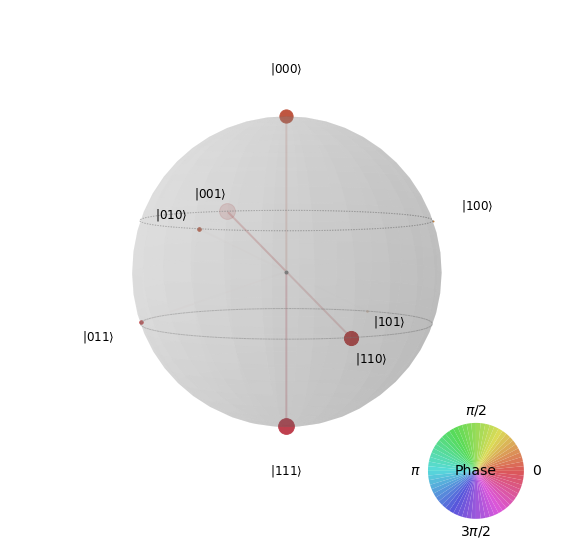

In [5]:
op = Operator(qc_evol) # to make it easy to multiply
psi_g = op.data.dot(psi_0)
pretty_print(psi_g)
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
plot_state_qsphere(psi_g, figsize=(10,10))

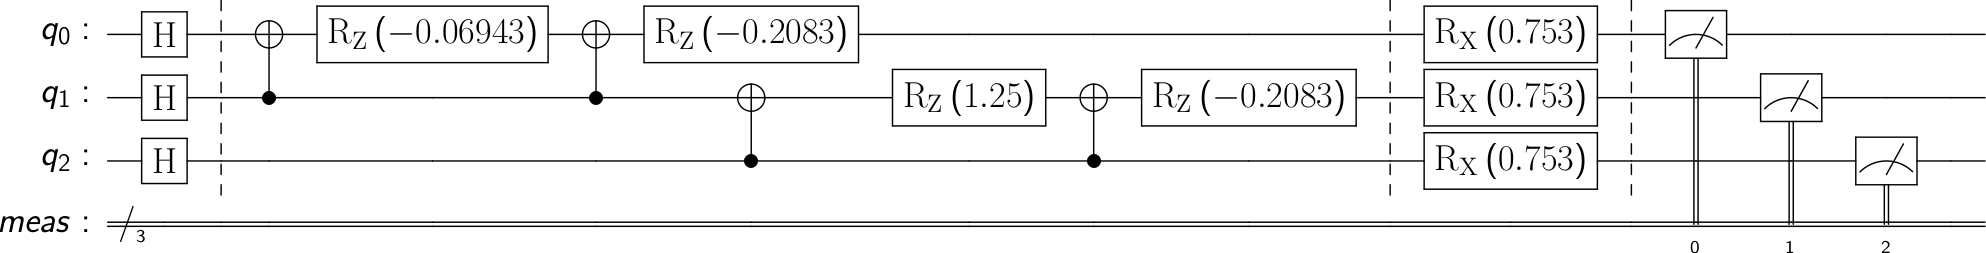

In [6]:
qc_qaoa = qc_init.compose(qc_evol)
qc_qaoa.measure_all()
qc_qaoa.draw(output='latex') # ref to fig:circuit_ideal